In [226]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# plug in your own Alpha Vantage API key!!!
file = open("AV_API_KEY.txt", "r")
AV_API_KEY = file.readline().strip()   
file.close()

ts_conn = TimeSeries(key="AV_API_KEY", output_format="pandas")
data, meta_data = ts_conn.get_daily_adjusted("KO", outputsize="full")
data = data.iloc[::-1]

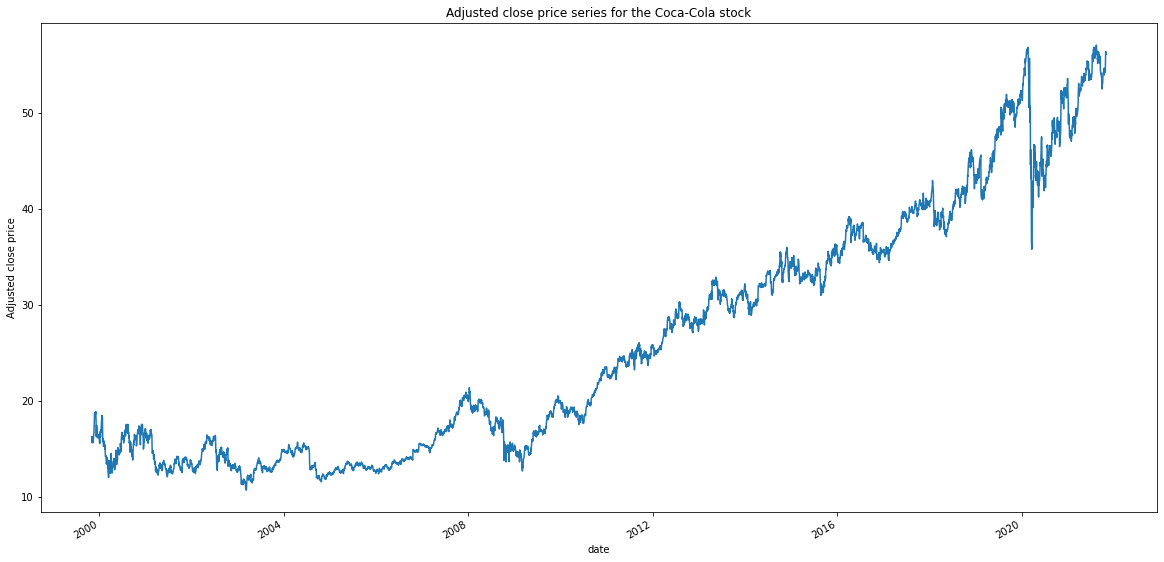

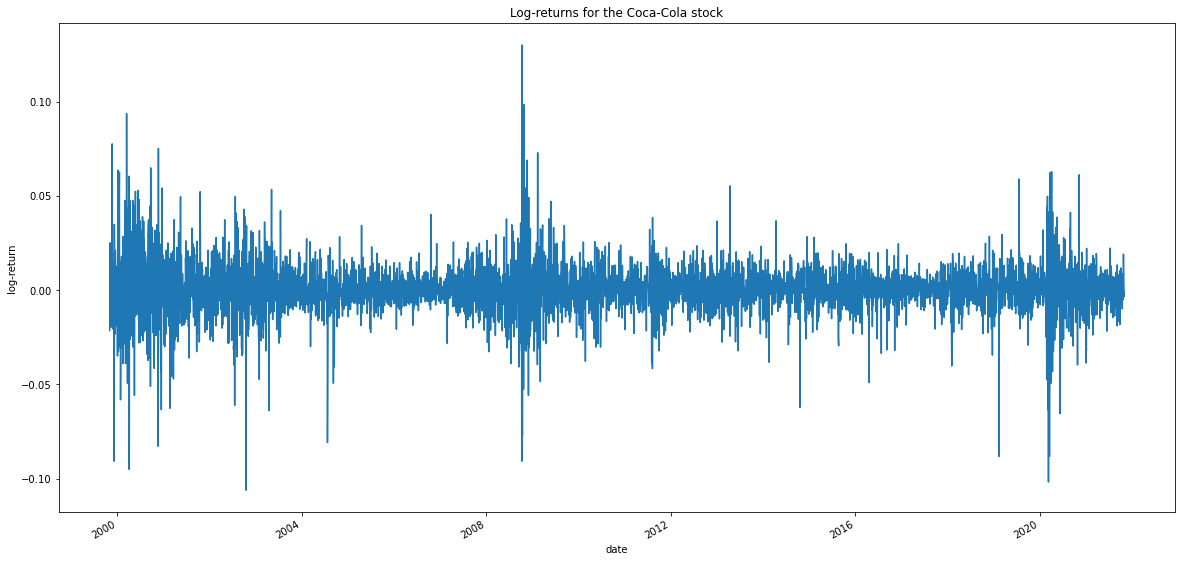

In [58]:
# calculate log-returns
data["log_return_adj_close"] = np.log(data["5. adjusted close"]) - np.log(data["5. adjusted close"].shift(1))

# plot data
plt.rcParams['figure.figsize'] = [20, 10]

data["5. adjusted close"].plot()
plt.title("Adjusted close price series for the Coca-Cola stock")
plt.ylabel("Adjusted close price")
plt.show()
data["log_return_adj_close"].plot()
plt.title("Log-returns for the Coca-Cola stock")
plt.ylabel("log-return")
plt.show()

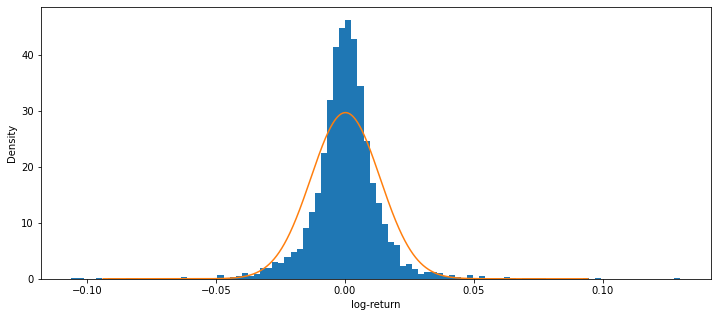

The empirical mean and standard deviation of the log-returns are 0.0002 and 0.0134 respectively 


In [234]:
# plot histogram

log_returns = data["log_return_adj_close"][1::]

n = len(log_returns)
mu = 1/n * np.sum(log_returns)
sigma = np.sqrt(1/n * np.sum((log_returns - mu)**2))  # np.sqrt(np.var(log_returns)), np.var is biased variance estimator


# normal density in histogram plot using mu and sigma estimates
def normal_density(x, mu, sigma):
    fx = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-1/2 * ((x-mu)/sigma)**2)
    return fx


x = np.linspace(mu - 7 * sigma, mu + 7 * sigma, 5000)
plt.rcParams['figure.figsize'] = [12, 5]

plt.hist(log_returns, bins=100, density=True)
plt.xlabel("log-return")
plt.ylabel("Density")
plt.plot(x, normal_density(x, mu, sigma))  # or use stats.norm.pdf(x, mu, sigma)

plt.show()

print(f"The empirical mean and standard deviation of the log-returns are {np.round(mu, 4)} and {np.round(sigma,4)} respectively ")

# Note:

- The log-return series seems to have more mass at the mean compared to the normal distribution
- We can also see fatter tails than the normal distribution, both in the left and the right tail


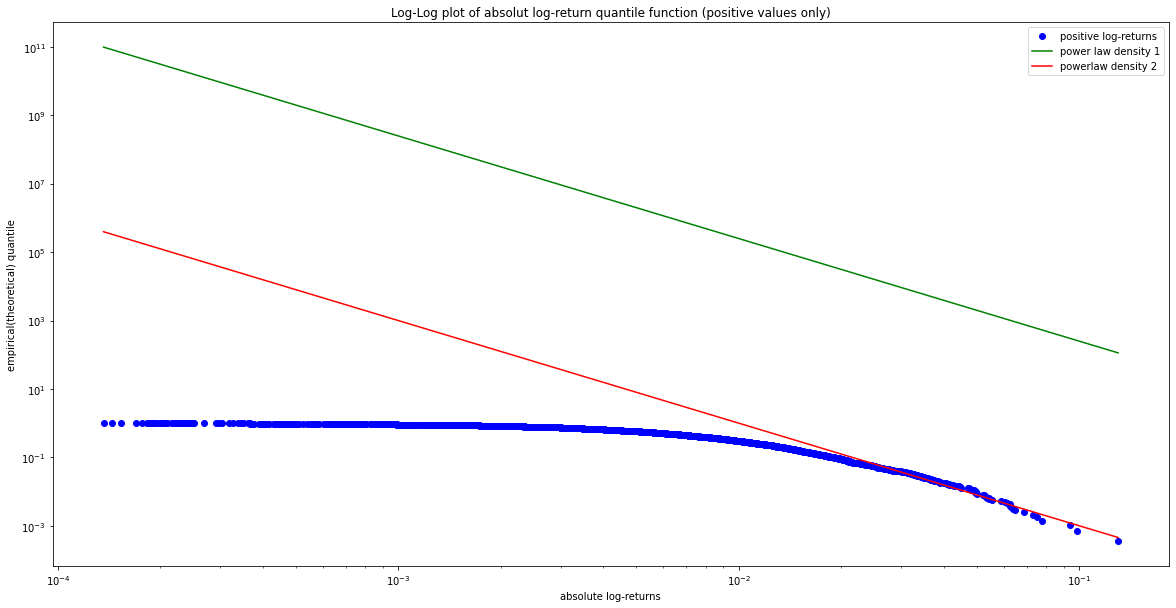

In [225]:
from scipy import stats

# qq-plot function:
def log_log_plot(x):
    
    x_pos = np.abs(x)
    x_pos = x[x > 0]
    x_sorted = np.flip(np.sort(x_pos))
    n = len(x_sorted)
    y = np.arange(1, n+1)/(n+1)
    pw1 = 1/stats.powerlaw.pdf(x_sorted,a=4)
    pw2 = 0.000001*x_sorted**(-3) 
    plt.plot(x_sorted, y, 'ob')
    plt.plot(x_sorted, pw1, color='g')
    plt.plot(x_sorted, pw2, color='r')
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel("empirical(theoretical) quantile")
    plt.xlabel("absolute log-returns")
    plt.title("Log-Log plot of absolut log-return quantile function (positive values only)")
    plt.legend(["positive log-returns", "power law density 1", "powerlaw density 2"])
    plt.show()
    return 



log_log_plot(log_returns)

Powerlaw density 1: $f(x,a) = \dfrac{1}{ax^{a-1}}, a=4$
<br>
<br>
Power density 2: $0.000001 x^{-3} $

In the tail, the empirical quantile function seems to fit the second power law quite well 

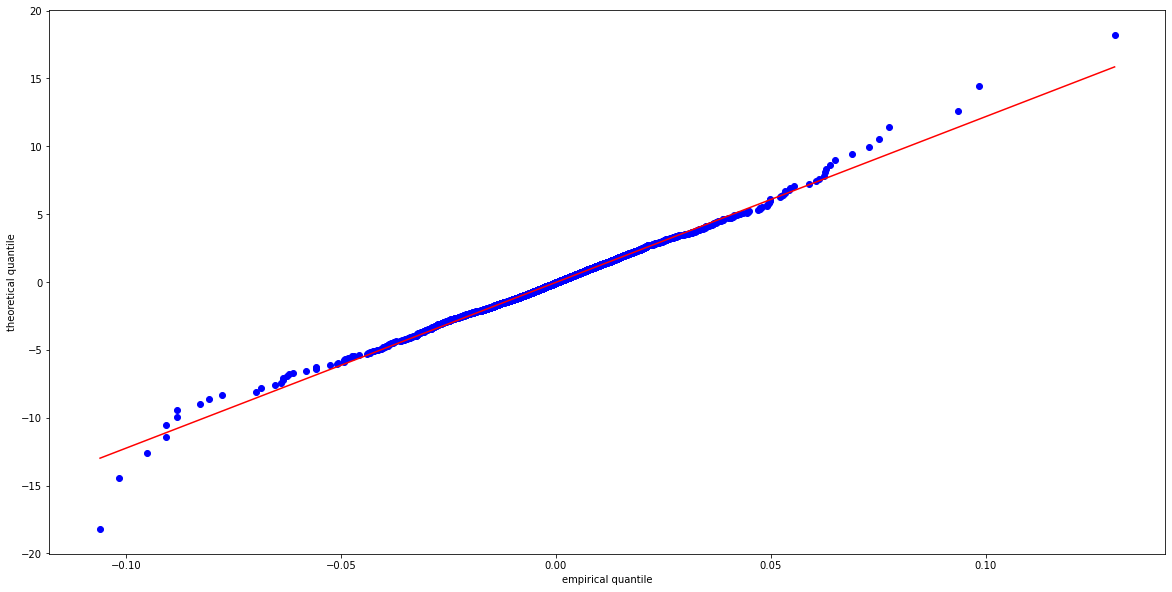

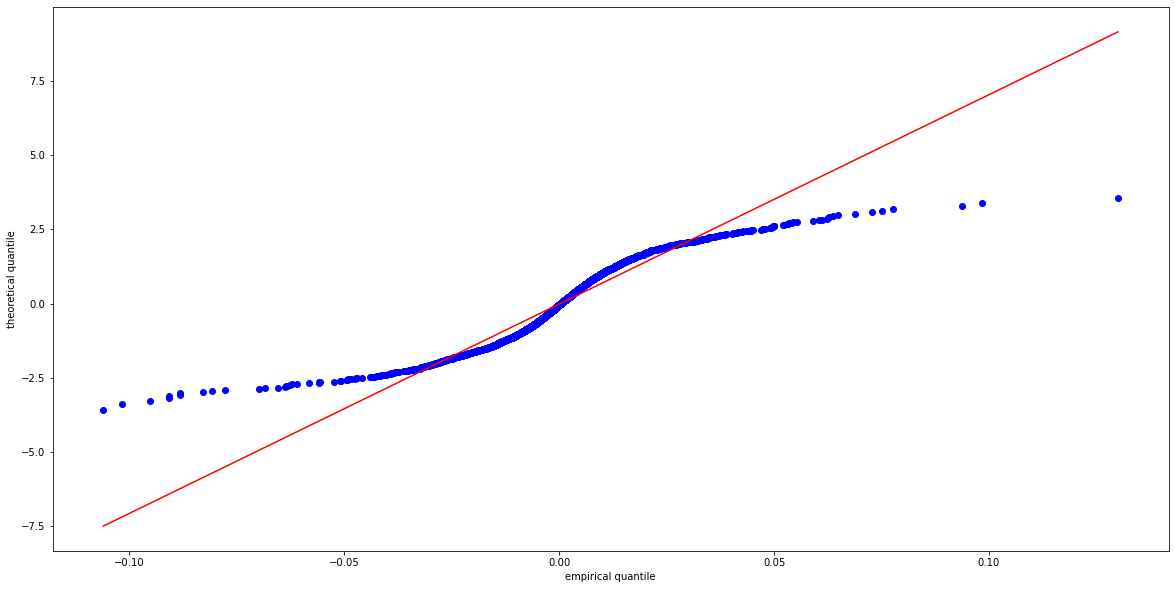

In [221]:
# qq-plot function:
def qq_plot(x, F_inv):
    n = len(x)
    x_sorted = np.flip(np.sort(x))
    F_th = F_inv((n-np.arange(1, n+1)+1)/(n+1))  # np.linspace(n/(n+1), 1/(n+1), num= n)
    plt.plot(x_sorted, F_th, 'ob')
    plt.xlabel("empirical quantile")
    plt.ylabel("theoretical quantile")

    slope, intercept, r_value, p_value, std_err = stats.linregress(x_sorted, F_th)
    plt.plot(x_sorted, intercept+slope*x_sorted, '-r')
    plt.show()
    return



#standard normal
def Norm_inv(x):
    return stats.norm.ppf(x)

def T_inv(x):
    return stats.t.ppf(x, df=3)




qq_plot(log_returns, T_inv)

qq_plot(log_returns, Norm_inv)

## QQ-plot

- The t-distribution with 3 degrees of freedom seems to fit the Coca-cola stock data quite good
- A normal distribution does not fit at all, as seen in the second QQ-plot. The empirical distibution has much fatter tails than expected from the a normal distribution